In [2]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [3]:
data = np.random.rand(2500,2)

data = data[((data[:, 0] > 0.6) | (data[:, 0] < 0.4)), :] 
data = data[((data[:, 1] > 0.6) | (data[:, 1] < 0.4)), :] 

label = (data[:, 0] > 0.5) & (data[:, 1] > 0.5).astype(np.uint8)

# Primera pràctica: perceptró.
## 14-XI-2022

Aquesta primera pràctica veurem com es dur a terme un entrenament d'aprenentatge automàtic. Hem de dur a terme el procés que heu vist a teoria:

![proces](proces.png)

# Dataset 

El primer que hem de fer es saber com són les dades. Ja que són **dades 2D**. Per visualizar-ho empram la llibreria *matplotlib*.

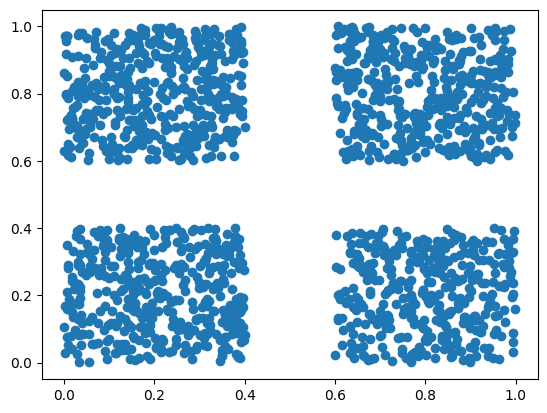

In [4]:
plt.scatter(data[:, 0], data[:, 1]);

Es interessant saber com es localitza l'etiqueta. Per fer-ho mostram cada punt a quina classe correspon.

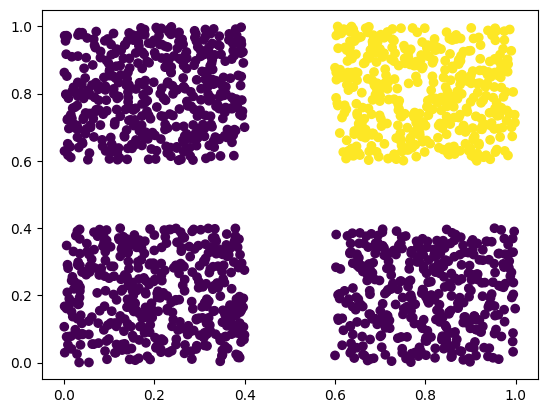

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=label);

Em de dividir les dades entre train i test. Per fer-ho emprarem les eines que tenim amb la lliberia *scikit-learn*. Em de definir:
* La mida del test.
* Un random state. Ens permet que sempre es divideix igual.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.33, random_state=42)

# Entrenament 

Entrenam un classificador, en particular un **Perceptró**. Un classificador és un model que ens permet fer prediccions binàries. Per entrenar-ho em de tenir en compte dues coses:
* Cada model té parametres que determinen com actuen.
* **Només em d'entrenar amb les dades d'entrenament**. 

In [7]:
clf = linear_model.Perceptron(tol=1e-3, random_state=42)
clf.fit(X_train, y_train);

El perceptró apren una divisió lineal. Podem mostrar aquesta divisió.

c:\Users\Sergi\Documents\GitHub\ia_2022\env\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


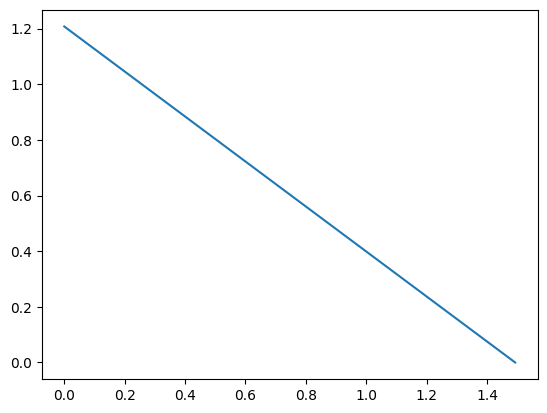

In [8]:
x_intercept = (0, -clf.intercept_ / clf.coef_[0][1])
y_intercept = (-clf.intercept_ / clf.coef_[0][0], 0)

plt.plot(x_intercept, y_intercept);

Evidentment la divisió per ella tota sola no ens permet observar res. A la següent passa li donarem sentit.

## Predicció i performance

Ho combinam amb la informació que tenim de test per observar si ha fet la divisió correctament. Per fer-ho, primer fem la predicció del conjunt de test.

In [9]:
pred = clf.predict(X_test)

Després pintam les dades, la seva predicció i la divisió.

c:\Users\Sergi\Documents\GitHub\ia_2022\env\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


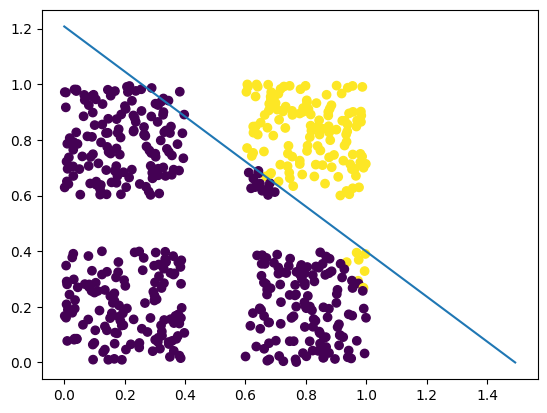

In [10]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.plot(x_intercept, y_intercept);

Obtenim les mètriques per saber si els resultats són millors o pitjors. Coneixem quatre mesures: *accuracy, recall, precision i F1-Score*. Podem emprar directament una eina que ho resumeix.

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       405
           1       0.95      0.91      0.93       138

    accuracy                           0.97       543
   macro avg       0.96      0.95      0.95       543
weighted avg       0.96      0.97      0.96       543



# Pràctica

## Primeres dades

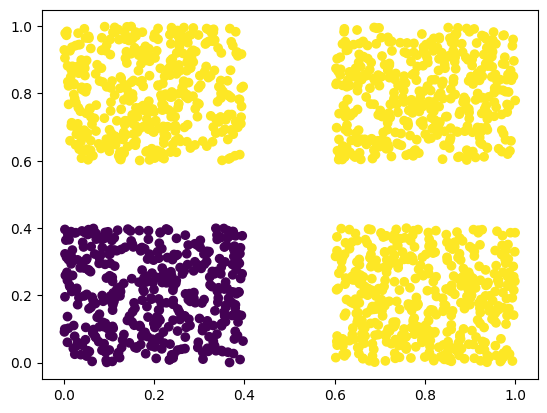

In [21]:
data = np.random.rand(2500,2)

data = data[((data[:, 0] > 0.6) | (data[:, 0] < 0.4)), :] 
data = data[((data[:, 1] > 0.6) | (data[:, 1] < 0.4)), :] 

label = (data[:, 0] > 0.5) | (data[:, 1] > 0.5).astype(np.uint8)
plt.scatter(data[:, 0], data[:, 1], c=label);

Dividir los datos en train y test. Mostrar los datos de train y test. Mostrar los datos de train y test con la etiqueta.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.53, random_state=42)

# Entrenamiento

A continuación se entrena un perceptrón y muestra la división lineal que ha aprendido con los datos de test.

In [23]:
clf = linear_model.Perceptron(tol=1e-3, random_state=42)
clf.fit(X_train, y_train);

c:\Users\Sergi\Documents\GitHub\ia_2022\env\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


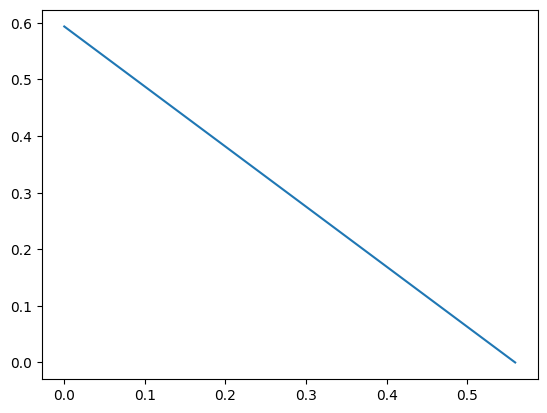

In [24]:
x_intercept = (0, -clf.intercept_ / clf.coef_[0][1])
y_intercept = (-clf.intercept_ / clf.coef_[0][0], 0)

plt.plot(x_intercept, y_intercept);

# Predicción y rendimiento

Se combina la información de test con la división lineal para observar si ha hecho la división correctamente. Se obtienen las métricas para saber si los resultados son mejores o peores.

c:\Users\Sergi\Documents\GitHub\ia_2022\env\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


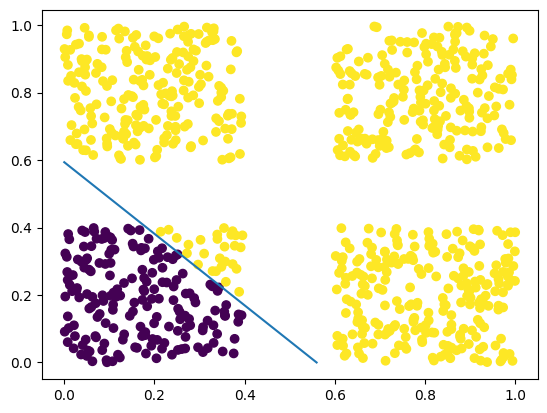

In [25]:
pred = clf.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.plot(x_intercept, y_intercept);

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       210
           1       0.96      1.00      0.98       651

    accuracy                           0.97       861
   macro avg       0.98      0.94      0.96       861
weighted avg       0.97      0.97      0.97       861



## Segones dades

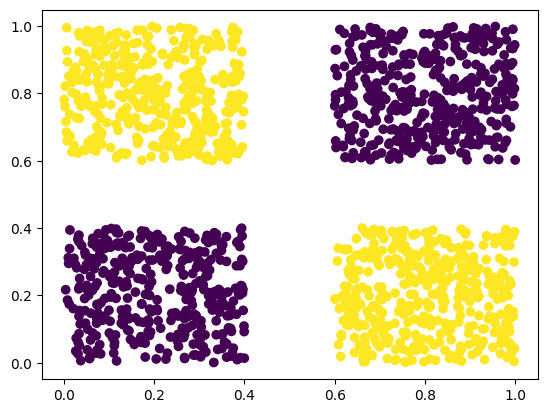

In [13]:
data = np.random.rand(2500,2)

data = data[((data[:, 0] > 0.6) | (data[:, 0] < 0.4)), :] 
data = data[((data[:, 1] > 0.6) | (data[:, 1] < 0.4)), :] 

label = np.bitwise_xor((data[:, 0] > 0.5), (data[:, 1] > 0.5)).astype(np.uint8)
plt.scatter(data[:, 0], data[:, 1], c=label);

Dividir los datos en train y test. Mostrar los datos de train y test. Mostrar los datos de train y test con la etiqueta.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.53, random_state=42)

# Entrenamiento

A continuación se entrena un perceptrón y muestra la división lineal que ha aprendido con los datos de test.

c:\Users\Sergi\Documents\GitHub\ia_2022\env\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


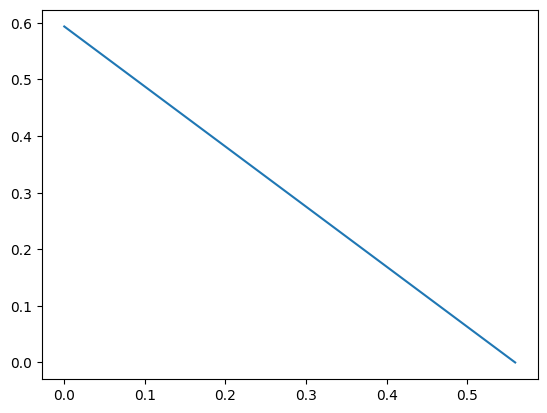

In [28]:
clf = linear_model.Perceptron(tol=1e-3, random_state=42)
clf.fit(X_train, y_train);

x_intercept = (0, -clf.intercept_ / clf.coef_[0][1])
y_intercept = (-clf.intercept_ / clf.coef_[0][0], 0)

plt.plot(x_intercept, y_intercept);

# Predicción y rendimiento

Se combina la información de test con la división lineal para observar si ha hecho la división correctamente. Se obtienen las métricas para saber si los resultados son mejores o peores.

c:\Users\Sergi\Documents\GitHub\ia_2022\env\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


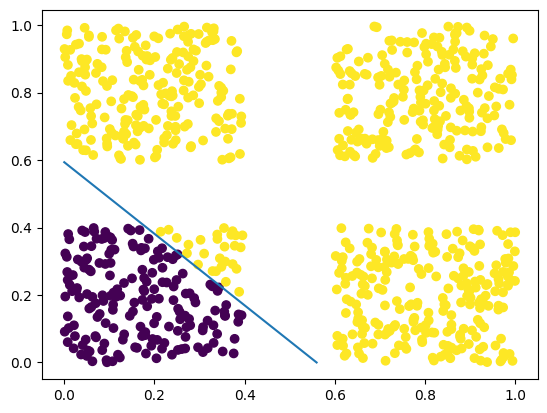

In [29]:
pred = clf.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.plot(x_intercept, y_intercept);

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       210
           1       0.96      1.00      0.98       651

    accuracy                           0.97       861
   macro avg       0.98      0.94      0.96       861
weighted avg       0.97      0.97      0.97       861

